In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline

1. Call in dataset
2. Extract most recent data 04-2021 for all MSOA to do steady eda analysis
3. Extract transient data for all MSOA to view time-dependent trends

In [3]:
df = pd.read_csv('../data/msoa_full_dataset_no_onehotencode.csv',index_col=['MSOA11CD','date'])
df.head()

ev_count  total_annual_income_2019  houseprice_dec_2019  \
MSOA11CD  date                                                               
E02000002 2015-01       0.0                   40146.9             333824.0   
          2015-02       0.0                   40146.9             333824.0   
          2015-03       0.0                   40146.9             333824.0   
          2015-04       0.0                   40146.9             333824.0   
          2015-05       0.0                   40146.9             333824.0   

                                     RUC11  IMDDecil  pv_count  \
MSOA11CD  date                                                   
E02000002 2015-01  Urban major conurbation       2.0       0.0   
          2015-02  Urban major conurbation       2.0       1.0   
          2015-03  Urban major conurbation       2.0       1.0   
          2015-04  Urban major conurbation       2.0       2.0   
          2015-05  Urban major conurbation       2.0       2.0   

                   public_charger_count  private_charger_count  n_months  \
MSOA11CD  date                                                             
E02000002 2015-01              2.363636               0.500000         0   
          2015-02              2.363636               0.549242         1   
          2015-03              2.363636               0.598485         2   
          2015-04              2.363636               0.647727         3   
          2015-05              2.363636               0.696970         4   

                       ev_price  total_energy_consumption  
MSOA11CD  date                                             
E02000002 2015-01  25278.290000                9510663.20  
          2015-02  25278.290000                9495582.95  
          2015-03  25278.290000                9480502.70  
          2015-04  25291.681667                9465422.45  
          2015-05  25305.073333                9450342.20

In [4]:
df.describe()

,ev_count,total_annual_income_2019,houseprice_dec_2019,IMDDecil,pv_count,public_charger_count,private_charger_count,n_months,ev_price,total_energy_consumption
count,436240.000000,436240.000000,4.362400e+05,436240.000000,436240.000000,436240.000000,436240.000000,436240.000000,436240.000000,4.362400e+05
mean,3.013573,43990.009948,2.639551e+05,5.056969,25.886088,3.115332,9.487934,37.500000,30685.260658,1.344186e+07
std,17.799920,9659.933723,1.563690e+05,2.929202,30.237287,5.441885,8.021487,21.937436,5066.216388,3.782369e+06
min,0.000000,19493.200000,3.083333e+04,0.000000,0.000000,0.000000,0.000000,0.000000,24005.530000,6.145672e+06
25%,0.000000,37047.312500,1.569779e+05,3.000000,8.000000,0.769231,3.656250,18.750000,25328.508750,1.077545e+07
50%,0.000000,43133.525000,2.325000e+05,5.000000,18.000000,1.548387,7.231481,37.500000,30284.810000,1.274291e+07
75%,0.000000,49932.287500,3.326242e+05,7.000000,33.000000,3.157895,13.064208,56.250000,33715.029167,1.541829e+07
max,507.000000,89767.050000,3.080000e+06,10.000000,491.000000,182.500000,49.666667,75.000000,45427.670000,4.442389e+07


In [5]:
idx = pd.IndexSlice
df_current = df.loc[idx[:,'2021-04'],:]

In [6]:
numeric_features = ['ev_count', 'total_annual_income_2019', 'houseprice_dec_2019', 
                    'IMDDecil', 'pv_count', 'public_charger_count', 'private_charger_count',
                     'total_energy_consumption']
categorical_features = ['RUC_11']


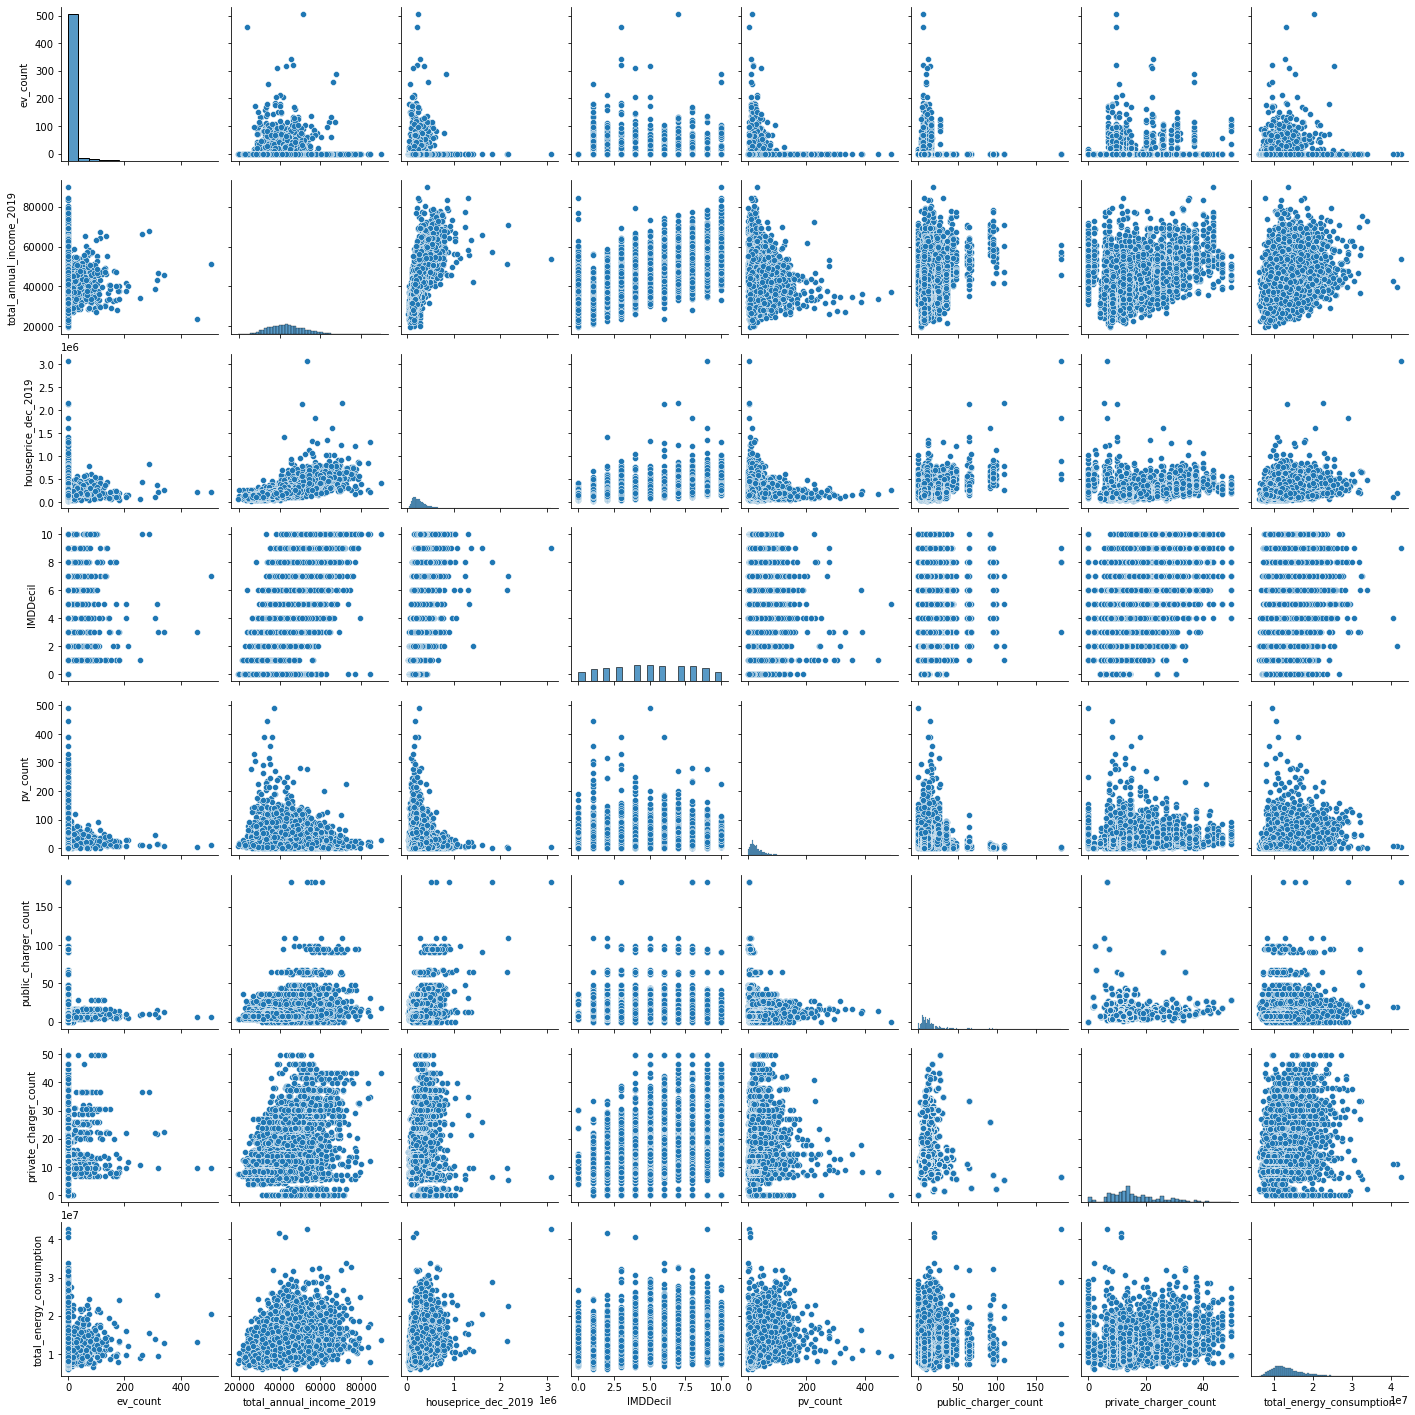

In [7]:
sns.pairplot(df_current[numeric_features])

## Univariate analysis

First with the targer variable EV count, we see that 6.6% contains a non-zero signal.

There are 5740 MSOA regions in our dataset, of which 381 have a non-zero EV count


/opt/anaconda/envs/Python3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'EV Count')

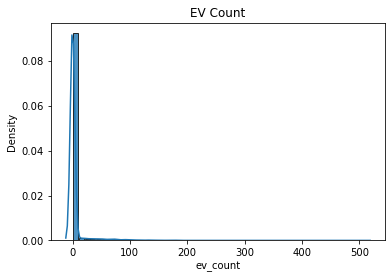

In [8]:
total_ev_count = np.count_nonzero(df_current["ev_count"])
total_msoa_count = df_current.shape[0]
print('There are %s MSOA regions in our dataset, of which %s have a non-zero EV count' % (total_msoa_count, total_ev_count))

ax = sns.distplot(df_current['ev_count'],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8})
ax.set_title('EV Count')

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Nonzero EV Count')

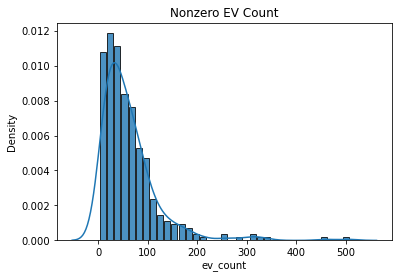

In [9]:
# find MSOAs with nonzero EV count at 2021-04
idx = pd.IndexSlice
df_current = df.loc[idx[:,'2021-04'],:]
msoa_nonzero_evcount = np.array(df_current[df_current.ev_count > 0].index.droplevel(1))

ax0 = sns.distplot(df_current.loc[idx[msoa_nonzero_evcount,:]]['ev_count'],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8})
ax0.set_title('Nonzero EV Count')

## Categorical data

Only categorical feature is the rural-urban classification

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Urban city and town'),
  Text(1, 0, 'Urban major conurbation'),
  Text(2, 0, 'Rural town and fringe'),
  Text(3, 0, 'Rural village and dispersed'),
  Text(4, 0, 'Urban minor conurbation'),
  Text(5, 0, 'Rural village and dispersed in a sparse setting'),
  Text(6, 0, 'Rural town and fringe in a sparse setting'),
  Text(7, 0, 'Urban city and town in a sparse setting')])

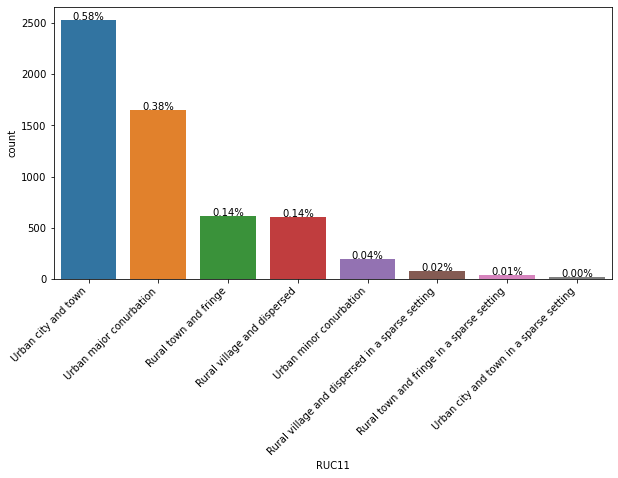

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='RUC11',
              data=df_current,
              order=df_current['RUC11'].value_counts().index)

total = float(len(df['RUC11']))
for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')
            
plt.xticks(rotation=45, ha='right')

## Numerical features

Look at distribution of each.

In [11]:
qualitative_colors = sns.color_palette("Set3", 10)
print(numeric_features)

['ev_count', 'total_annual_income_2019', 'houseprice_dec_2019', 'IMDDecil', 'pv_count', 'public_charger_count', 'private_charger_count', 'total_energy_consumption']


/opt/anaconda/envs/Python3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda/envs/Python3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda/envs/Python3/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/anaconda/envs/Python3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureW

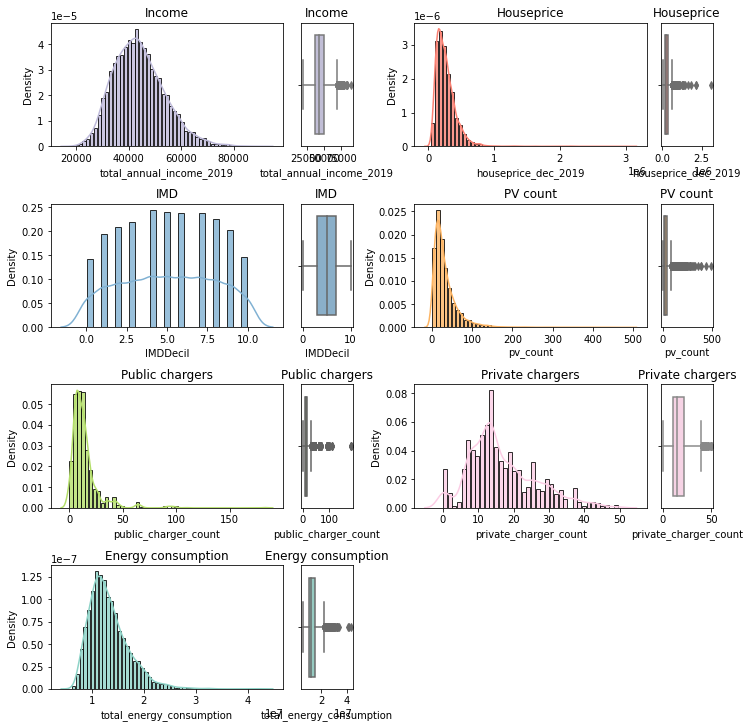

In [12]:
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
grid = gridspec.GridSpec(ncols=10, nrows=4, figure=fig)

ax1 = fig.add_subplot(grid[0, :4])
ax1.set_title('Income')
ax1 = sns.distplot(df_current['total_annual_income_2019'],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                  color = qualitative_colors[2])

ax11 = fig.add_subplot(grid[0, 4:5])
ax11.set_title('Income')
ax11= sns.boxplot(df_current['total_annual_income_2019'], orient='v',color = qualitative_colors[2])

ax2 = fig.add_subplot(grid[0, 5:9])
ax2.set_title('Houseprice')
ax2 = sns.distplot(df_current['houseprice_dec_2019'],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                  color = qualitative_colors[3])

ax21 = fig.add_subplot(grid[0, 9:])
ax21.set_title('Houseprice')
ax21= sns.boxplot(df_current['houseprice_dec_2019'], orient='v',color = qualitative_colors[3])

ax3 = fig.add_subplot(grid[1, :4])
ax3.set_title('IMD')
ax3 = sns.distplot(df_current['IMDDecil'],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                  color = qualitative_colors[4])

ax31 = fig.add_subplot(grid[1, 4:5])
ax31.set_title('IMD')
ax31= sns.boxplot(df_current['IMDDecil'], orient='v',color = qualitative_colors[4])

ax4 = fig.add_subplot(grid[1, 5:9])
ax4.set_title('PV count')
ax4 = sns.distplot(df_current['pv_count'],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                  color = qualitative_colors[5])

ax41 = fig.add_subplot(grid[1, 9:])
ax41.set_title('PV count')
ax41= sns.boxplot(df_current['pv_count'], orient='v',color = qualitative_colors[5])


ax5 = fig.add_subplot(grid[2, :4])
ax5.set_title('Public chargers')
ax5 = sns.distplot(df_current['public_charger_count'],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                  color = qualitative_colors[6])

ax51 = fig.add_subplot(grid[2, 4:5])
ax51.set_title('Public chargers')
ax51= sns.boxplot(df_current['public_charger_count'], orient='v',color = qualitative_colors[6])

ax6 = fig.add_subplot(grid[2, 5:9])
ax6.set_title('Private chargers')
ax6 = sns.distplot(df_current['private_charger_count'],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                  color = qualitative_colors[7])

ax61 = fig.add_subplot(grid[2, 9:])
ax61.set_title('Private chargers')
ax61= sns.boxplot(df_current['private_charger_count'], orient='v',color = qualitative_colors[7])

ax7 = fig.add_subplot(grid[3, :4])
ax7.set_title('Energy consumption')
ax7 = sns.distplot(df_current['total_energy_consumption'],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                  color = qualitative_colors[0])

ax71 = fig.add_subplot(grid[3, 4:5])
ax71.set_title('Energy consumption')
ax71= sns.boxplot(df_current['total_energy_consumption'], orient='v',color = qualitative_colors[0])


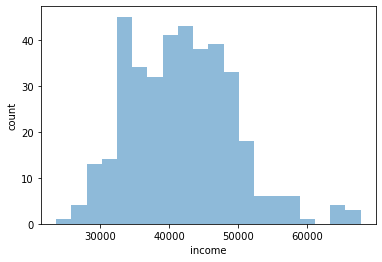

In [13]:
# distribution of income wrt ev presence

plt.hist([df_current[df_current.ev_count>0].total_annual_income_2019],
          bins = 20, alpha = 0.5)
plt.xlabel("income")
plt.ylabel("count")
plt.show()

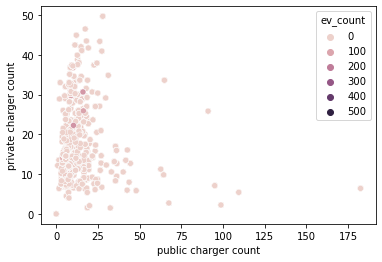

In [14]:
# distribution of chargers wrt ev presence
sns.scatterplot(data=df_current, 
                x="public_charger_count", 
                y="private_charger_count",
                hue='ev_count')
plt.xlabel("public charger count")
plt.ylabel("private charger count")
plt.show()

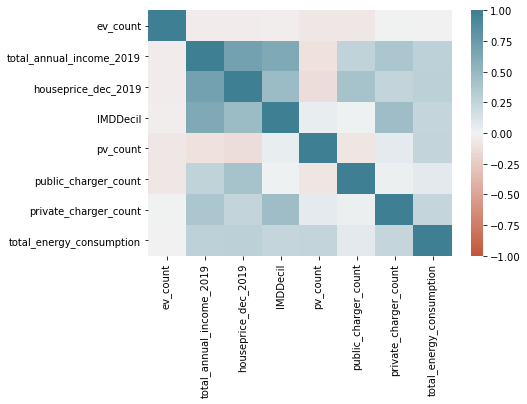

In [17]:
#1. univariate analysis of categorical data wrt ev count
#2. trends between numerical data wrt ev count and each other
fig, ax = plt.subplots()
plt.tight_layout()
sns.heatmap(df_current[numeric_features].corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20,220,n=200))
plt.savefig('heatmap_features.png', bbox_inches="tight")

## Bivariate analysis

Looking at the distritbutions of the numeric features and how they vary when there is a nonzero EV count.

In [ ]:
# add boolean column for where EVs are present
df_current['ev_present'] = (df_current['ev_count']>0).astype(int)

In [ ]:
df_current.head()

In [ ]:
plt.figure(figsize=(16, 10))
sns.pairplot(df_current[['total_annual_income_2019', 'houseprice_dec_2019', 
                    'IMDDecil', 'pv_count', 'public_charger_count', 'private_charger_count',
                     'total_energy_consumption','ev_present']],hue="ev_present")

plt.show()

## EV Count trend

In [ ]:
# for non
msoa_ev_nonzero_trend = np.zeros(76)
ev_sum = 0

fig, ax = plt.subplots()
for msoa in msoa_nonzero_evcount:
    ev_trend_normalised = df.loc[idx[msoa,:],:]['ev_count'].values / df.loc[idx[msoa,:],:]['ev_count'].values[-1]
    msoa_ev_nonzero_trend +=df.loc[idx[msoa,:],:]['ev_count'].values
    ev_sum += df.loc[idx[msoa,:],:]['ev_count'].values[-1]
    ax = plt.plot(ev_trend_normalised, alpha=0.2)

msoa_ev_nonzero_trend = msoa_ev_nonzero_trend / ev_sum
ax = plt.plot(msoa_ev_nonzero_trend, color='k')
#ax.set_title('Normalised EV growth')
#ax.set_x

In [ ]:
idx = pd.IndexSlice
df_current = df.loc[idx[:,'2021-04'],:]
msoa_nonzero_evcount = np.array(df_current[df_current.ev_count > 0].index.droplevel(1))

In [ ]:
(df.loc[idx[msoa_nonzero_evcount,'2015-01'],:].ev_count==0).sum()

In [ ]:
df.loc[idx['E02006901',:],:].ev_count.plot()

In [ ]:
df_current.ev_count.sum()